In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage,centroid
from scipy.cluster.hierarchy import fcluster

In [68]:
Cars_df=pd.read_csv('cars-dataset.csv', skiprows=0)

In [60]:
Cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [69]:
Cars_df.shape

(398, 8)

In [20]:
Cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


*There are no missing values in the dataset.*

In [36]:
Cars_df.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


*There are some non-numeric values in 'hp' column.*

In [70]:
Cars_df=Cars_df[pd.to_numeric(Cars_df['hp'], errors='coerce').notnull()]

In [71]:
Cars_df.shape

(392, 8)

In [39]:
Cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [73]:
Cars_df=Cars_df.convert_objects(convert_numeric=True)

In [74]:
Cars_df.shape

(392, 8)

In [27]:
Cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [42]:
Cars_df.corr()

,cyl,disp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
wt,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


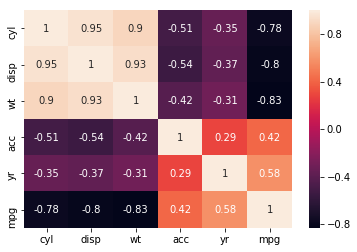

In [29]:
sns.heatmap(Cars_df.corr(),annot=True)

* No. of Cylinders in the car, Displacement, Horse Power and Weight of the car are highly correlated with each other.
* No. of Cylinders in the car, Displacement, Horse Power and Weight of the car are high neagtively correlated with MPG. 

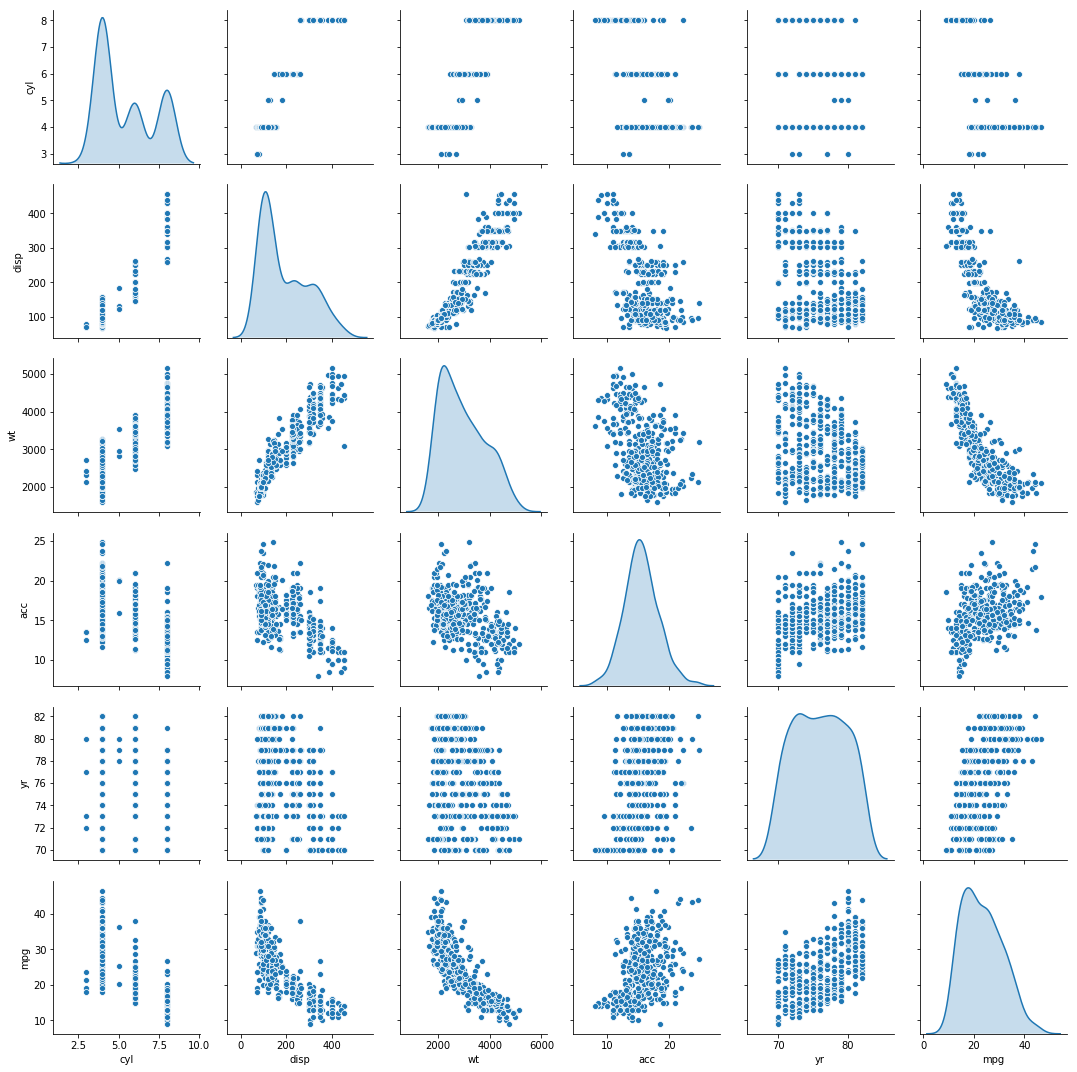

In [30]:
sns.pairplot(Cars_df,diag_kind='kde')

* The data distribution across various dimensions except 'Acc' do not look normal.
* Close observation between 'mpg' and other attributes indicate the relationship is not really linear.
* Relation between 'mpg' and 'hp' show hetroscedacity... which will im

### K-Means Clustering :

In [31]:
#First normalize the data.

In [62]:
Cars_df_Scaled=Cars_df.drop('car name',axis=1)

In [64]:
Cars_df

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,chevrolet chevelle malibu,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,buick skylark 320,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,plymouth satellite,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,amc rebel sst,3433,12.0,70,16.0
4,ford torino,8,302.0,ford torino,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,ford galaxie 500,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,chevrolet impala,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,plymouth fury iii,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,pontiac catalina,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,amc ambassador dpl,3850,8.5,70,15.0


In [75]:
Cars_df_Scaled=Cars_df_Scaled.apply(zscore)

TypeError: ("unsupported operand type(s) for /: 'str' and 'int'", 'occurred at index hp')

In [47]:
Distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Cars_df_Scaled)
    kmeanModel.fit(Cars_df_Scaled)
    Distortions.append(
        sum(np.min(cdist(Cars_df_Scaled,kmeanModel.cluster_centers_,'euclidean'),axis=1)**2 / Cars_df_Scaled.shape[0]))
plt.plot(range(1,11),Distortions,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

NameError: name 'Cars_df_Scaled' is not defined

*As seen in Elbow plot, there is no significant drop in Sum of Squared Error after K=3. So Optimal Value of K is 3.*

In [ ]:
Distortions

In [ ]:
KMeans_Model = KMeans(n_clusters=3,max_iter=300,n_init=10,random_state=0)
KMeans_Model.fit(Cars_df_Scaled)

In [ ]:
cluster_center = KMeans_Model.cluster_centers_
cluster_center

In [ ]:
clusters = KMeans_Model.labels_
clusters

In [ ]:
len(KMeans_Model.labels_)

In [ ]:
Cars_df['Car Type']=KMeans_Model.labels_

In [ ]:
Cars_df.sample(5)

In [ ]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,3,1),y=Cars_df.groupby(['Car Type']).count()['mpg'].values)
x=axis.set_xlabel("Car Type")
x=axis.set_ylabel("Number of cars")

In [ ]:
Car_Type_0=Cars_df[Cars_df['Car Type']==0]
Car_Type_1=Cars_df[Cars_df['Car Type']==1]
Car_Type_2=Cars_df[Cars_df['Car Type']==2]

In [ ]:
Car_Type_0.drop('car name',axis=1,inplace=True)

In [ ]:
Car_Type_1.drop('car name',axis=1,inplace=True)

In [ ]:
Car_Type_2.drop('car name',axis=1,inplace=True)

*For Linear Regression, We consider MPG as our target variable.*

*Linear Regression Model for Cluster 0 :*

In [ ]:
Car_Type_0_X = Car_Type_0.drop(['mpg','Car Type'],axis=1)
Car_Type_0_y = Car_Type_0[['mpg']]

In [ ]:
Car_Type_0_LR = LinearRegression()
Car_Type_0_LR.fit(Car_Type_0_X,Car_Type_0_y)
intercept = Car_Type_0_LR.intercept_[0]
print("The intercept for our model is {}".format(intercept))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Car_Type_0_LR.coef_[0][idx]))

In [ ]:
y_pred = Car_Type_0_LR.predict(Car_Type_0_X)
print(Car_Type_0_LR.score(Car_Type_0_X,Car_Type_0_y))
plt.scatter(Car_Type_0_y['mpg'], y_pred)

*Linear Regression Model for Cluster 1 :*

In [ ]:
Car_Type_1_X = Car_Type_1.drop(['mpg','Car Type'],axis=1)
Car_Type_1_y = Car_Type_1[['mpg']]

In [ ]:
Car_Type_1_LR = LinearRegression()
Car_Type_1_LR.fit(Car_Type_1_X,Car_Type_1_y)
intercept = Car_Type_1_LR.intercept_[0]
print("The intercept for our model is {}".format(intercept))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Car_Type_1_LR.coef_[0][idx]))

In [ ]:
y_pred = Car_Type_1_LR.predict(Car_Type_1_X)
print(Car_Type_1_LR.score(Car_Type_1_X,Car_Type_1_y))
plt.scatter(Car_Type_1_y['mpg'], y_pred)

*Linear Regression Model for Cluster 2 :*

In [ ]:
Car_Type_2_X = Car_Type_2.drop(['mpg','Car Type'],axis=1)
Car_Type_2_y = Car_Type_2[['mpg']]

In [ ]:
Car_Type_2_LR = LinearRegression()
Car_Type_2_LR.fit(Car_Type_2_X,Car_Type_2_y)
intercept = Car_Type_2_LR.intercept_[0]
print("The intercept for our model is {}".format(intercept))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Car_Type_2_LR.coef_[0][idx]))

In [ ]:
y_pred = Car_Type_2_LR.predict(Car_Type_2_X)
print(Car_Type_2_LR.score(Car_Type_2_X,Car_Type_2_y))
plt.scatter(Car_Type_2_y['mpg'], y_pred)

### Agglomerative Clustering :

In [ ]:
AGG_Model = linkage(Cars_df_Scaled, 'ward', metric='euclidean')

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    AGG_Model,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

*Let's print the last 12 merged clusters.*

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

*From Truncated Dendrogram, there is huge jump in distance after 25. So we choose optimal value of distance as 25.*

In [ ]:
max_d = 25
Clusters = fcluster(AGG_Model, max_d, criterion='distance')
print(Clusters)

In [ ]:
Cars_df_AGG=Cars_df.drop('Car Type',axis=1)

In [ ]:
Cars_df_AGG.head()

In [ ]:
Cars_df_AGG['Car Type']=Clusters

In [ ]:
Cars_df_AGG.sample(5)

In [ ]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(1,4,1),y=Cars_df_AGG.groupby(['Car Type']).count()['mpg'].values)
x=axis.set_xlabel("Car Type")
x=axis.set_ylabel("Number of cars")

In [ ]:
Car_Type_1_AGG=Cars_df_AGG[Cars_df_AGG['Car Type']==1]
Car_Type_2_AGG=Cars_df_AGG[Cars_df_AGG['Car Type']==2]
Car_Type_3_AGG=Cars_df_AGG[Cars_df_AGG['Car Type']==3]

In [ ]:
Car_Type_1_AGG.drop('car name',axis=1,inplace=True)

In [ ]:
Car_Type_2_AGG.drop('car name',axis=1,inplace=True)

In [ ]:
Car_Type_3_AGG.drop('car name',axis=1,inplace=True)

*For Linear Regression, We consider MPG as our target variable.*

*Linear Regression Model for Cluster 1 :*

In [ ]:
Car_Type_1_AGG_X = Car_Type_1_AGG.drop(['mpg','Car Type'],axis=1)
Car_Type_1_AGG_y = Car_Type_1_AGG[['mpg']]

In [33]:
Car_Type_1_AGG_LR = LinearRegression()
Car_Type_1_AGG_LR.fit(Car_Type_1_AGG_X,Car_Type_1_AGG_y)
intercept = Car_Type_1_AGG_LR.intercept_[0]
print("The intercept for our model is {}".format(intercept))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Car_Type_1_AGG_LR.coef_[0][idx]))

NameError: name 'Car_Type_1_AGG_X' is not defined

In [ ]:
y_pred = Car_Type_1_AGG_LR.predict(Car_Type_1_AGG_X)
print(Car_Type_1_AGG_LR.score(Car_Type_1_AGG_X,Car_Type_1_AGG_y))
plt.scatter(Car_Type_1_AGG_y['mpg'], y_pred)

*Linear Regression Model for Cluster 2 :*

In [ ]:
Car_Type_2_AGG_X = Car_Type_2_AGG.drop(['mpg','Car Type'],axis=1)
Car_Type_2_AGG_y = Car_Type_2_AGG[['mpg']]

In [ ]:
Car_Type_2_AGG_LR = LinearRegression()
Car_Type_2_AGG_LR.fit(Car_Type_2_AGG_X,Car_Type_2_AGG_y)
intercept = Car_Type_2_AGG_LR.intercept_[0]
print("The intercept for our model is {}".format(intercept))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Car_Type_2_AGG_LR.coef_[0][idx]))

In [ ]:
y_pred = Car_Type_2_AGG_LR.predict(Car_Type_2_AGG_X)
print(Car_Type_2_AGG_LR.score(Car_Type_2_AGG_X,Car_Type_2_AGG_y))
plt.scatter(Car_Type_2_AGG_y['mpg'], y_pred)

*Linear Regression Model for Cluster 3 :*

In [ ]:
Car_Type_3_AGG_X = Car_Type_3_AGG.drop(['mpg','Car Type'],axis=1)
Car_Type_3_AGG_y = Car_Type_3_AGG[['mpg']]

In [ ]:
Car_Type_3_AGG_LR = LinearRegression()
Car_Type_3_AGG_LR.fit(Car_Type_3_AGG_X,Car_Type_3_AGG_y)
intercept = Car_Type_3_AGG_LR.intercept_[0]
print("The intercept for our model is {}".format(intercept))
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Car_Type_3_AGG_LR.coef_[0][idx]))

In [ ]:
y_pred = Car_Type_3_AGG_LR.predict(Car_Type_3_AGG_X)
print(Car_Type_3_AGG_LR.score(Car_Type_3_AGG_X,Car_Type_3_AGG_y))
plt.scatter(Car_Type_3_AGG_y['mpg'], y_pred)